In [3]:
import numpy as np
import pandas as pd
import copy

df = np.array(pd.read_csv('Mall_Customers.csv'))[:,2:]
a = (df - df.min(axis=0))/ (df.max(axis=0)-df.min(axis=0))

def k_means(a,h2,k):
    gx = h2
    idx = np.argmin(np.sum(abs(a-gx),axis=-1),axis = 0)
    h2 = []
    y = 0
    for i in range(int(k)):
        x = np.average(a[np.argwhere(idx == i)],axis = 0)
        y = y + np.sum(np.power(a[np.argwhere(idx == i)]-x,2))
        h2.append(x)
    h2 = np.array(h2)
    if np.sum(abs(gx - h2)) < 0.001:
        return h2,y,idx
    else:
        return k_means(a,h2,k)

In [4]:
k = input("Bạn muốn tạo ra bao nhiêu cụm?:  ")
h2 = a[np.random.choice(a.shape[0], int(k), replace=False)].reshape(int(k),1,3)
tam,_,idx = k_means(a,h2,k)
for i,j in enumerate(tam):
    print('-Tâm cụm %r là: %r'%(i+1,list(j[0])))

Bạn muốn tạo ra bao nhiêu cụm ạ?:  4
-Tâm cụm 1 là: [0.28470919324577865, 0.5601759296281488, 0.8359880537580885]
-Tâm cụm 2 là: [0.41939443535188237, 0.5136030694105337, 0.19626574033868868]
-Tâm cụm 3 là: [0.13636363636363635, 0.2105812220566319, 0.590909090909091]
-Tâm cụm 4 là: [0.7246963562753035, 0.28070175438596495, 0.4282133906194055]


In [3]:
idx

array([1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [4]:
wc = []
for k in range(1,10):
    h2 = a[np.random.choice(a.shape[0], int(k), replace=False)].reshape(int(k),1,3)      
    _,kc,_ = k_means(a,h2,k)
    wc.append(kc)

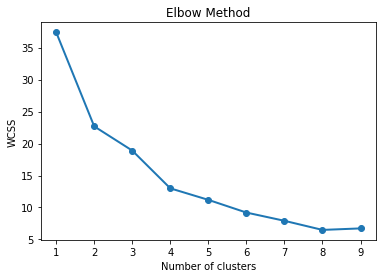

In [9]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15,6))
plt.plot(range(1, 10), wc, marker='o',linewidth=2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()